In [1]:
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.tree import DecisionTreeClassifier
#from ydata_profiling import ProfileReport
import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats as stats

/Users/vanshbansal/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
credit = pd.read_csv("train 2.csv")
credit

/var/folders/cf/47mgd2gx2r17z1vchly_bhd00000gn/T/ipykernel_67468/1848400797.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  credit = pd.read_csv("train 2.csv")


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228,Poor
99996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.65161,Poor
99997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,Poor
99998,0x25fec,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.164979,Standard


In [3]:
df = credit

In [4]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

# Cleaning Data

### Splitting strings with '_' and taking the int part out of it

In [5]:
# Splitting strings and taking the 0th index
credit['Annual_Income'] = credit['Annual_Income'].str.split('_').str[0]
credit['Age'] = credit['Age'].str.split('_').str[0]
credit['Num_of_Loan'] = credit['Num_of_Loan'].str.split('_').str[0]
credit['Num_of_Delayed_Payment'] = credit['Num_of_Delayed_Payment'].str.split('_').str[0]
#credit['Changed_Credit_Limit'] = credit['Changed_Credit_Limit'].str.split('_').str[0]
credit['Outstanding_Debt'] = credit['Outstanding_Debt'].str.split('_').str[0]
#credit['Credit_Utilization_Ratio'] = credit['Credit_Utilization_Ratio'].str.split('_').str[0]
credit['Amount_invested_monthly'] = credit['Amount_invested_monthly'].str.split('_').str[0]
credit['Monthly_Balance'] = credit['Monthly_Balance'].str.split('_').str[0]


### Converting all str columns to numeric

In [6]:
credit['Annual_Income'] = pd.to_numeric(credit['Annual_Income'], errors='coerce')
credit['Age'] = pd.to_numeric(credit['Age'], errors='coerce')
credit['Num_of_Loan'] = pd.to_numeric(credit['Num_of_Loan'], errors='coerce')
credit['Num_of_Delayed_Payment'] = pd.to_numeric(credit['Num_of_Delayed_Payment'], errors='coerce')
credit['Outstanding_Debt'] = pd.to_numeric(credit['Outstanding_Debt'], errors='coerce')
credit['Amount_invested_monthly'] = pd.to_numeric(credit['Amount_invested_monthly'], errors='coerce')
credit['Monthly_Balance'] = pd.to_numeric(credit['Monthly_Balance'], errors='coerce')

In [7]:
credit['Amount_invested_monthly'] = pd.to_numeric(credit['Amount_invested_monthly'])
credit['Monthly_Balance'] = pd.to_numeric(credit['Monthly_Balance'])

In [8]:
credit['Num_of_Loan'] = pd.to_numeric(credit['Num_of_Loan'])
credit['Num_of_Delayed_Payment'] = pd.to_numeric(credit['Num_of_Delayed_Payment'])
credit['Outstanding_Debt'] = pd.to_numeric(credit['Outstanding_Debt'])

In [9]:
credit['Changed_Credit_Limit'] = credit['Changed_Credit_Limit'].str.replace('_' , ' ')
credit['Changed_Credit_Limit'] = pd.to_numeric(credit['Changed_Credit_Limit'] , errors='coerce')

### Cleaning the payment_behaviour column
The paymnent behaviour column has '!@9#%8' values at lots of places so we will replace them

In [10]:
credit['Payment_Behaviour'] = credit['Payment_Behaviour'].str.replace('!@9#%8' , '')

### Cleaning Payment_of_Min_Amount column

In [11]:
credit['Payment_of_Min_Amount'].unique()

array(['No', 'NM', 'Yes'], dtype=object)

In [12]:
credit['Payment_of_Min_Amount'] = credit['Payment_of_Min_Amount'].str.replace('NM' , '')

### cleaning credit mix column

In [13]:
credit['Credit_Mix'] = credit['Credit_Mix'].replace('_' , np.nan)

### cleaning occupation column

In [14]:
credit['Occupation'].unique()

array(['Scientist', '_______', 'Teacher', 'Engineer', 'Entrepreneur',
       'Developer', 'Lawyer', 'Media_Manager', 'Doctor', 'Journalist',
       'Manager', 'Accountant', 'Musician', 'Mechanic', 'Writer',
       'Architect'], dtype=object)

In [15]:
credit['Occupation'] = credit['Occupation'].replace('_______' , np.nan)

### Converting Credit_History_Age to months

In [16]:
import re
def convert_to_months(duration):
    if pd.isna(duration):
        return np.nan

    # Regular expression to extract years and months
    match = re.match(r'(?:(\d+) Years?)?(?: and )?(?:(\d+) Months?)?', duration)
    if match:
        years = match.group(1)
        months = match.group(2)

        # Convert to months
        total_months = (int(years) * 12 if years else 0) + (int(months) if months else 0)
        return total_months

    # Return NaN if the format does not match
    return np.nan

In [17]:
credit['Credit_History_Age'] = credit['Credit_History_Age'].apply(convert_to_months)

## Removing all weird or unusual data

### Creating custom conditions for each column

These conditions were made by looking and observing the histplots of all the columns

In [18]:

# Define the conditions for each column
conditions = {
    # Condition for age
    'Age': (credit['Age'] > 60) | (credit['Age'] <= 0),

    # Condition for number of bank accounts
    'Num_Bank_Accounts': (credit['Num_Bank_Accounts'] >20) | (credit['Num_Bank_Accounts'] < 0),

    # Condition for Interest rate
    'Interest_Rate': (credit['Interest_Rate'] > 100) | (credit['Interest_Rate'] < 0),

    # Condition for Num_Credit_Card
    'Num_Credit_Card': (credit['Num_Credit_Card'] > 30) | (credit['Num_Credit_Card'] < 0),

    # Num_of_Loan
    'Num_of_Loan': (credit['Num_of_Loan'] > 20) | (credit['Num_of_Loan'] < 0),

    # Delay_from_due_date
    'Delay_from_due_date': (credit['Delay_from_due_date'] > 200) | (credit['Delay_from_due_date'] < 0),

    # Num_of_Delayed_Payment
    'Num_of_Delayed_Payment': (credit['Num_of_Delayed_Payment'] > 200) | (credit['Num_of_Delayed_Payment'] < 0),

    # Changed_Credit_Limit
    'Changed_Credit_Limit': (credit['Changed_Credit_Limit'] > 100) | (credit['Changed_Credit_Limit'] < 0),

    # Num_Credit_Inquiries
    'Num_Credit_Inquiries': (credit['Num_Credit_Inquiries'] > 100) | (credit['Num_Credit_Inquiries'] < 0),

    # Outstanding_Debt
    'Outstanding_Debt': (credit['Outstanding_Debt'] < 0),

    # Credit_Utilization_Ratio
    'Credit_Utilization_Ratio': (credit['Credit_Utilization_Ratio'] > 100) | (credit['Credit_Utilization_Ratio'] < 0)

}

## Applying all the conditions and replacing them with NaN

In [19]:
# Apply conditions to replace with NaN
for column, condition in conditions.items():
    credit.loc[condition, column] = np.nan

### Converting months to their numbers

In [20]:
credit['Month'] = pd.to_datetime(credit['Month'], format='%B').dt.month

### Storing the data to have a look at it

In [21]:
# credit.to_csv("cleaned_credit.csv")

### Removing unnecessary  columns(not req for analysis)

In [22]:
credit.drop(columns=['ID' , 'Customer_ID' , 'Name' , 'SSN'] , inplace = True)

# Peforming EDA

This is some basic EDA performed to get range of certain columns to clean them and better understand them.<br>
In depth analysis will be observed by generating the profile report using sklearn.

/Users/vanshbansal/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


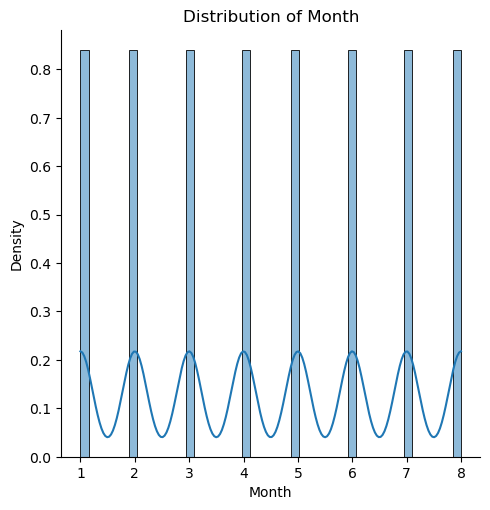

/Users/vanshbansal/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


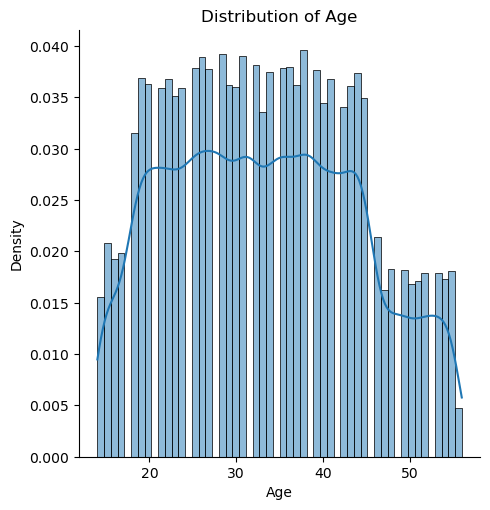

/Users/vanshbansal/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


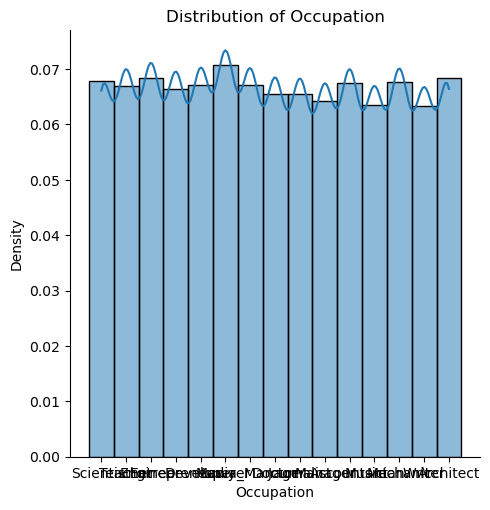

/Users/vanshbansal/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


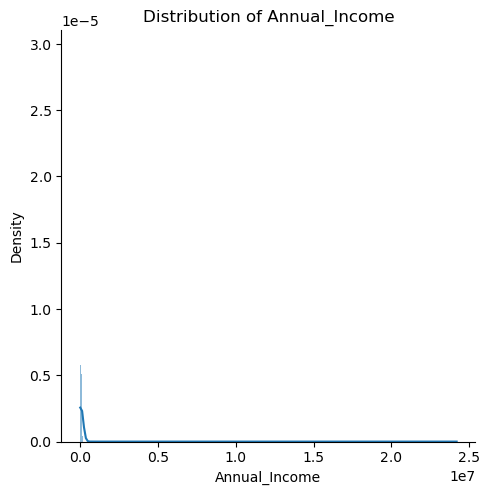

/Users/vanshbansal/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


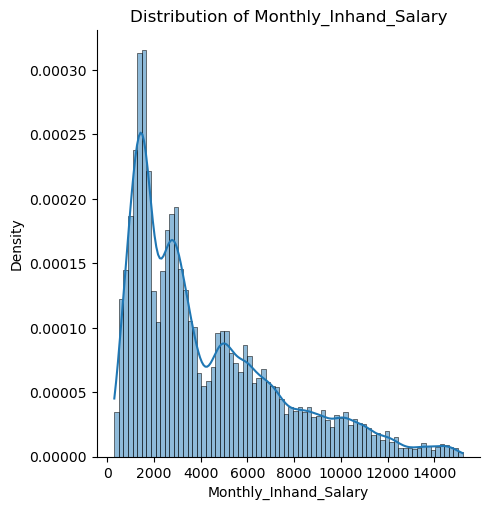

/Users/vanshbansal/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


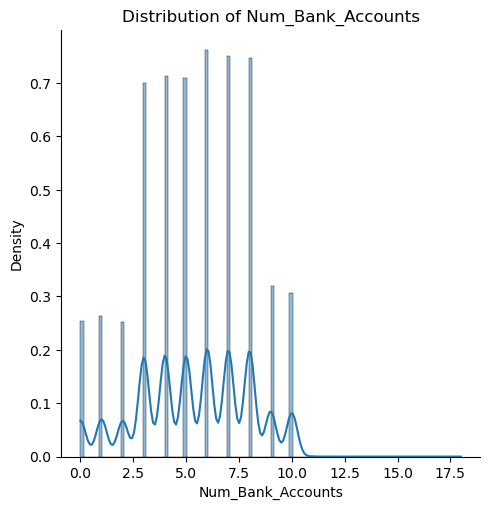

/Users/vanshbansal/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


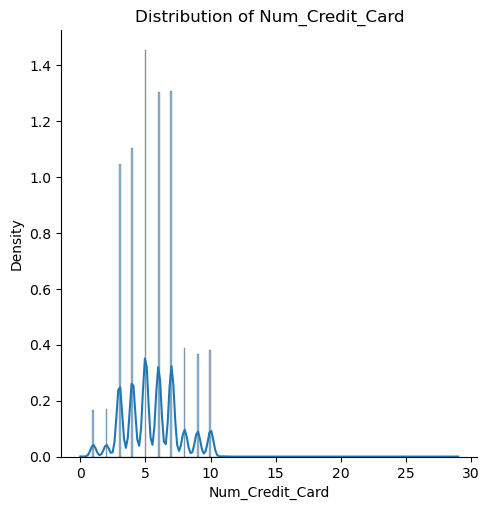

/Users/vanshbansal/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


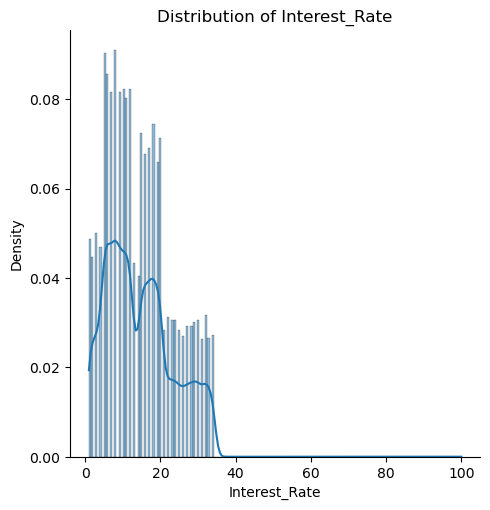

/Users/vanshbansal/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


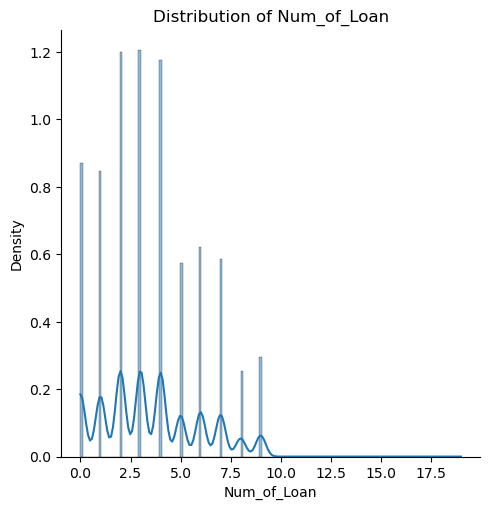

/Users/vanshbansal/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/Users/vanshbansal/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


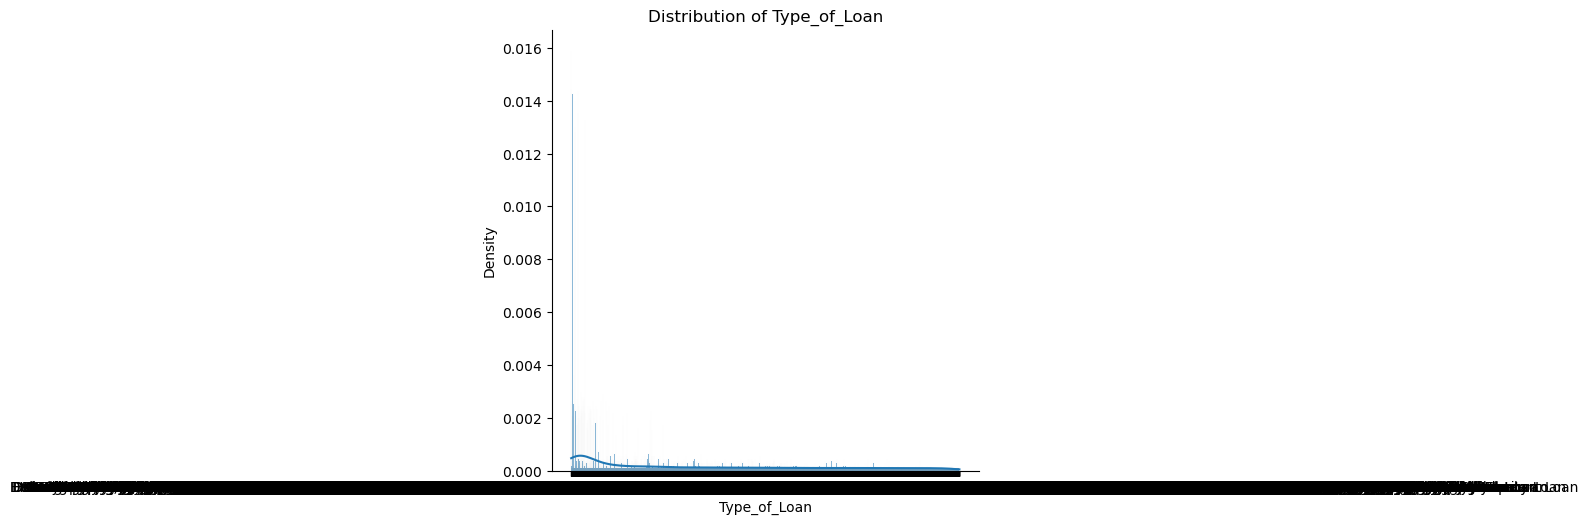

/Users/vanshbansal/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


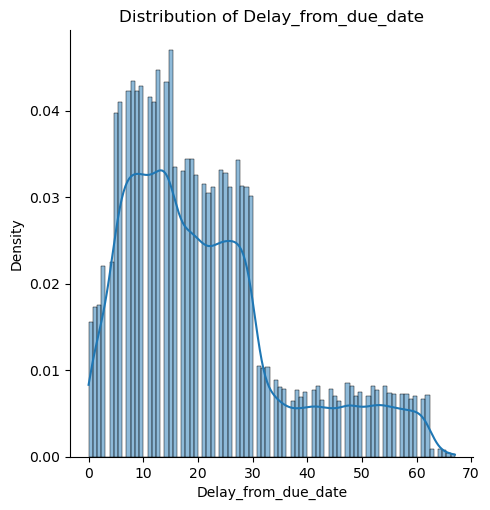

/Users/vanshbansal/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


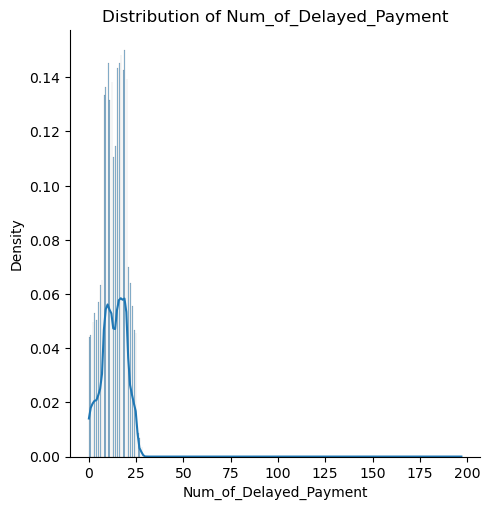

/Users/vanshbansal/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


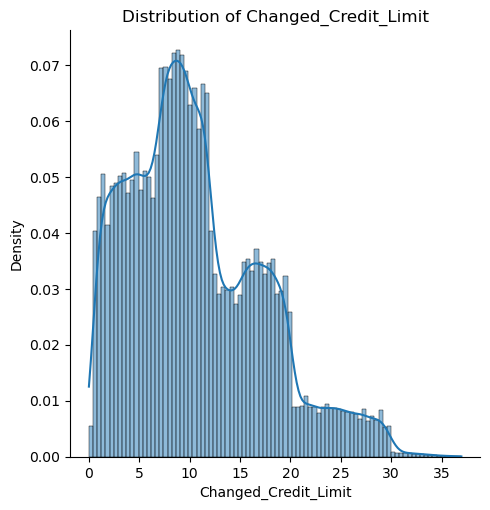

/Users/vanshbansal/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


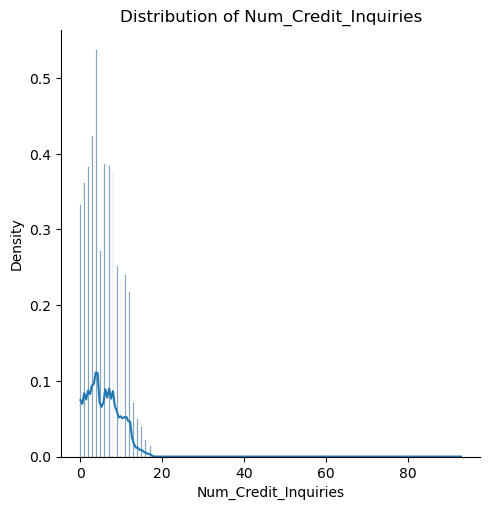

/Users/vanshbansal/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


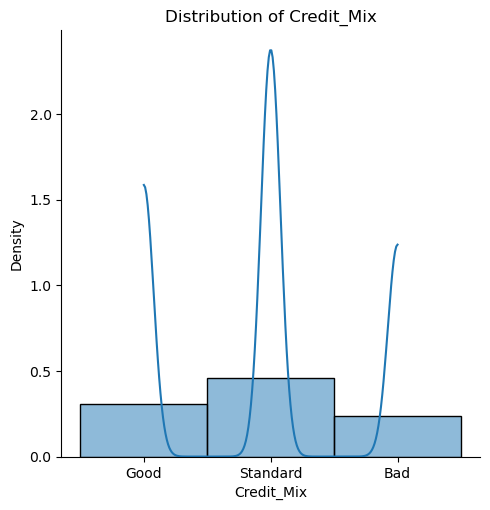

/Users/vanshbansal/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


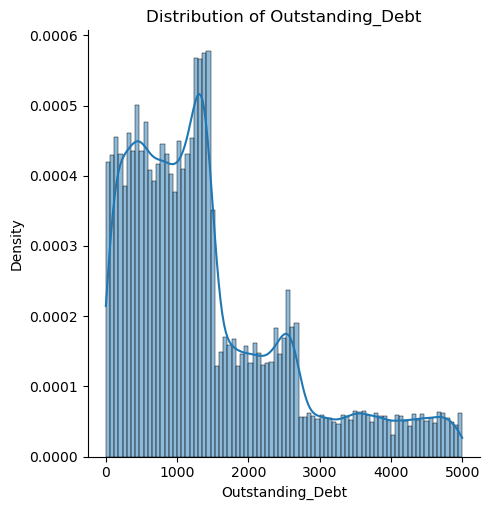

/Users/vanshbansal/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


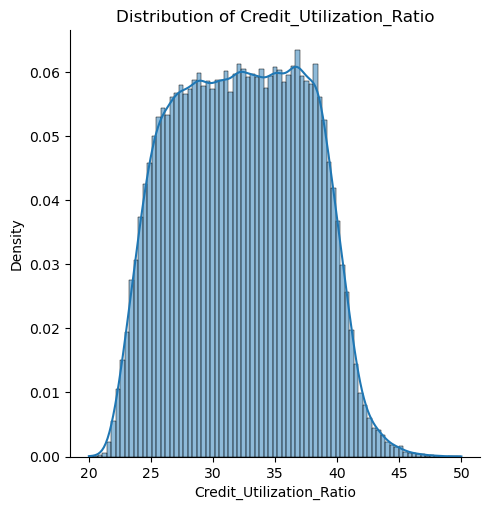

/Users/vanshbansal/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


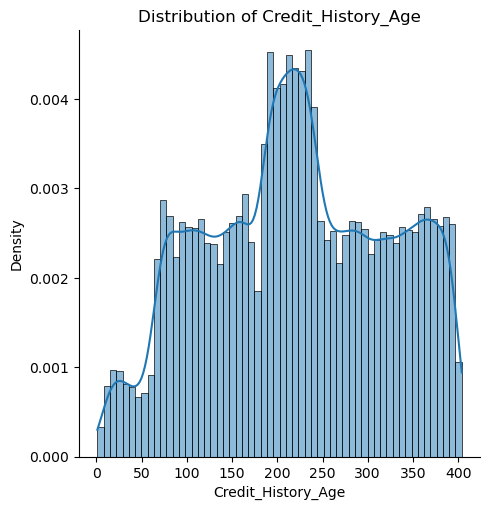

/Users/vanshbansal/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


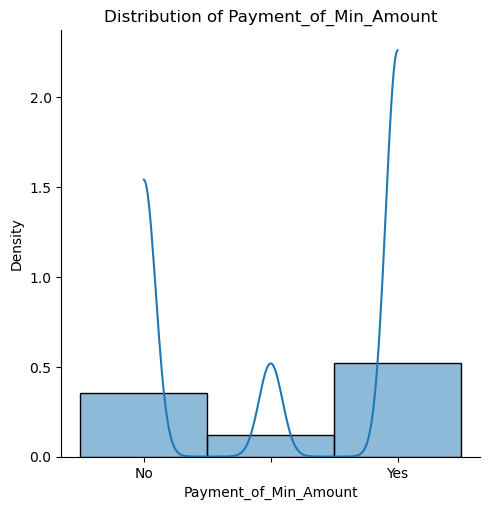

/Users/vanshbansal/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


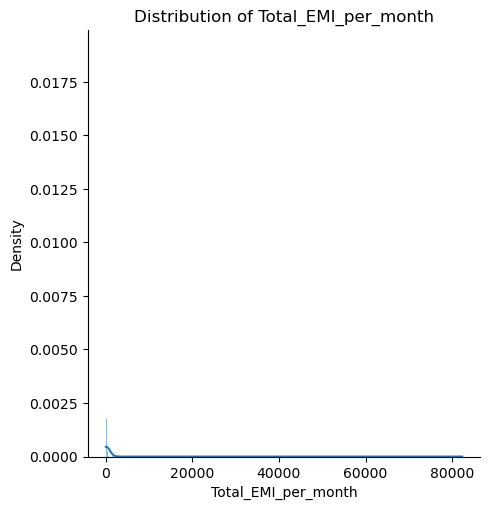

/Users/vanshbansal/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


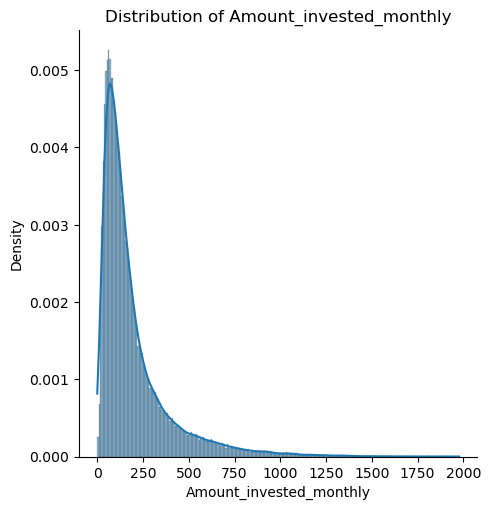

/Users/vanshbansal/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


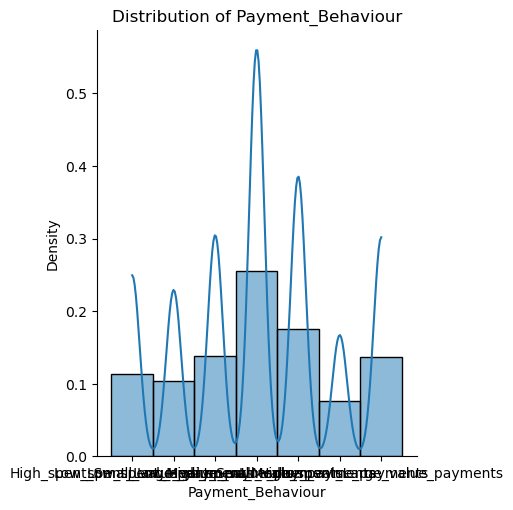

/Users/vanshbansal/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


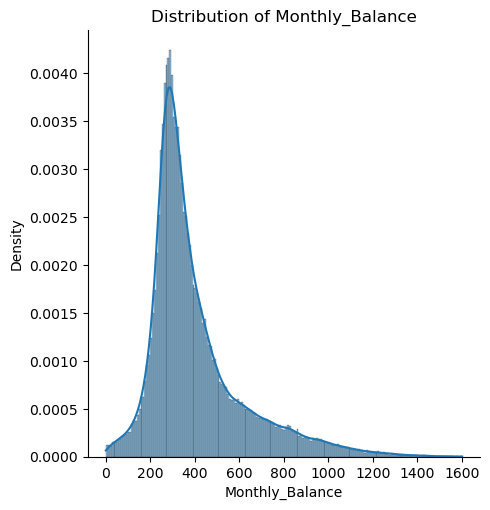

/Users/vanshbansal/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


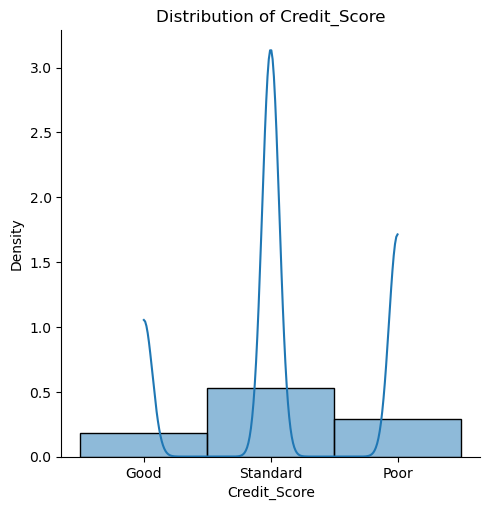

In [23]:
for column in credit.columns:
    sns.displot(credit[column], kde=True, stat='density')
    plt.title(f'Distribution of {column}')
    plt.show()  # Show the plot for each column

In [24]:
credit

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,1,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,NaN,809.98,26.822620,265.0,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,2,23.0,Scientist,19114.12,NaN,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,31.944960,NaN,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
2,3,NaN,Scientist,19114.12,NaN,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,28.609352,267.0,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good
3,4,23.0,Scientist,19114.12,NaN,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,31.377862,268.0,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,5,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,24.797347,269.0,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,4,25.0,Mechanic,39628.99,3359.415833,4.0,6.0,7.0,2.0,"Auto Loan, and Student Loan",...,NaN,502.38,34.663572,378.0,No,35.104023,60.971333,High_spent_Large_value_payments,NaN,Poor
99996,5,25.0,Mechanic,39628.99,3359.415833,4.0,6.0,7.0,2.0,"Auto Loan, and Student Loan",...,NaN,502.38,40.565631,379.0,No,35.104023,54.185950,High_spent_Medium_value_payments,NaN,Poor
99997,6,25.0,Mechanic,39628.99,3359.415833,4.0,6.0,NaN,2.0,"Auto Loan, and Student Loan",...,Good,502.38,41.255522,380.0,No,35.104023,24.028477,High_spent_Large_value_payments,NaN,Poor
99998,7,25.0,Mechanic,39628.99,3359.415833,4.0,6.0,7.0,2.0,"Auto Loan, and Student Loan",...,Good,502.38,33.638208,381.0,No,35.104023,251.672582,Low_spent_Large_value_payments,NaN,Standard


# Dealing with missing values

In [25]:
df = credit.copy()
df1 = credit.copy()
df2 = credit.copy()

In [26]:
df.isnull().sum()

Month                           0
Age                          2781
Occupation                   7062
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts            1335
Num_Credit_Card              2244
Interest_Rate                2012
Num_of_Loan                  4345
Type_of_Loan                11408
Delay_from_due_date           591
Num_of_Delayed_Payment       8350
Changed_Credit_Limit         3677
Num_Credit_Inquiries         3567
Credit_Mix                  20195
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      8784
Payment_Behaviour               0
Monthly_Balance              2877
Credit_Score                    0
dtype: int64

In [27]:
df.columns

Index(['Month', 'Age', 'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Type_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment',
       'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Credit_Mix',
       'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

## Using multiClassBinarizer to deal with type_of_loans column

In [28]:
from sklearn.preprocessing import MultiLabelBinarizer

# Fill NaN/None values with empty lists, then split and strip each loan type
df['Type_of_Loan'] = df['Type_of_Loan'].fillna('').str.replace(', and ', ', ').str.split(', ')
df['Type_of_Loan'] = df['Type_of_Loan'].apply(lambda x: x if isinstance(x, list) else [])

# Use MultiLabelBinarizer to one-hot encode
mlb = MultiLabelBinarizer()
loan_dummies = pd.DataFrame(mlb.fit_transform(df['Type_of_Loan']),
                            columns=mlb.classes_,
                            index=df.index)

# Concatenate the original DataFrame with the one-hot encoded columns
df = pd.concat([df, loan_dummies], axis=1)

# Get the column names to reorder them
columns = df.columns.tolist()

# Find the index of 'Type_of_Loan' column
loan_list_idx = columns.index('Type_of_Loan')

# Reorder columns: Place loan_dummies columns just after 'Type_of_Loan'
reordered_columns = columns[:loan_list_idx+1] + loan_dummies.columns.tolist() + columns[loan_list_idx+1:]

# Reassign DataFrame with reordered columns
df = df[reordered_columns]

# At this point, all columns should be retained, no trimming is necessary.
# You can verify the columns by checking:
print(df.columns)


Index(['Month', 'Age', 'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Type_of_Loan', '', 'Auto Loan', 'Credit-Builder Loan',
       'Debt Consolidation Loan', 'Home Equity Loan', 'Mortgage Loan',
       'Not Specified', 'Payday Loan', 'Personal Loan', 'Student Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score', '', 'Auto Loan', 'Credit-Builder Loan',
       'Debt Consolidation Loan', 'Home Equity Loan', 'Mortgage Loan',
       'Not Specified', 'Payday Loan', 'Personal Loan', 'Student Loan'],
      dtype='object')


In [29]:
reordered_columns.index('Credit_Score')

33

In [30]:
#Since each loan type columns were created at the end , we will just trim them
columns.index('Credit_Score')
df = df.iloc[: , :34]

In [31]:
df.columns

Index(['Month', 'Age', 'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Type_of_Loan', '', 'Auto Loan', 'Credit-Builder Loan',
       'Debt Consolidation Loan', 'Home Equity Loan', 'Mortgage Loan',
       'Not Specified', 'Payday Loan', 'Personal Loan', 'Student Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

### Dropping type_of_loan and not specified column

In [32]:
df.drop(columns=['Not Specified' , 'Type_of_Loan' , ''] , inplace=True)

In [33]:
df.isnull().sum()

Month                           0
Age                          2781
Occupation                   7062
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts            1335
Num_Credit_Card              2244
Interest_Rate                2012
Num_of_Loan                  4345
Auto Loan                       0
Credit-Builder Loan             0
Debt Consolidation Loan         0
Home Equity Loan                0
Mortgage Loan                   0
Payday Loan                     0
Personal Loan                   0
Student Loan                    0
Delay_from_due_date           591
Num_of_Delayed_Payment       8350
Changed_Credit_Limit         3677
Num_Credit_Inquiries         3567
Credit_Mix                  20195
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      8784
Payment_Behaviour               0
Monthly_Balanc

### Replacing empty strings with nan

In [34]:
df.replace('', np.nan , inplace=True)

### dropping columns with missing value in payment behaviour and occupation

We will drop these missing values because they account to less than 0.1% of our data

In [35]:
df.dropna(subset=['Payment_Behaviour'] , inplace=True)

In [36]:
df.dropna(subset=['Occupation'] , inplace=True)

# Getting report of data

In [37]:
# from ydata_profiling import ProfileReport
# prof = ProfileReport(df)
# prof.to_file(output_file='credit.html')

## Dropping unnecessary columns

Occupation , month , Payment_of_Min_Amount , 'Credit_Mix' and payment behaviour have reduced the accuracy of our model so we will drop them

In [38]:
df.drop(columns=['Occupation' , 'Month'] , inplace=True)

In [39]:
df.drop(columns=['Payment_Behaviour'] , inplace=True)

In [40]:
df.drop(columns=['Payment_of_Min_Amount' , 'Credit_Mix'] , inplace=True)

## Train-Test-Split

In [41]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(df.drop(columns=['Credit_Score']), df['Credit_Score'] , test_size=0.2 , random_state=42)

## Encoding Y column using LabelEncoder


In [42]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(y_train)

y_train = le.transform(y_train)
y_test= le.transform(y_test)

# Creating a Pipeline and predicting

## 1-a) Dealing with missing Values

### Knn imputation

missing values present in<br> 
age(1) , Monthly_Inhand_Salary(4) , Num_Bank_Accounts(5) , Num_Credit_Card(6) , Interest_Rate(7) , Num_of_Loan(8) , Delay_from_due_date , Num_of_Delayed_Payment , Changed_Credit_Limit ,Num_Credit_Inquiries, Credit_Mix , Credit_History_Age, Payment_of_Min_Amount, Total_EMI_per_month,  Amount_invested_monthly(17) , Monthly_Balance(19) , 

1,4,5,6,7,8,17,19 <br>

## 1-b) One Hot Encoding for categorical data

occupation(2) , Payment_Behaviour(18) , Credit_Mix , Payment_of_Min_Amount 

In [44]:
from sklearn.impute import KNNImputer
# Define columns
missing_columns = ['Age', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Credit_History_Age', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance']

categorical_col = ['Payment_Behaviour']

# Define transformers
knn_trf = ColumnTransformer(
    transformers=[
        ("num_missing", KNNImputer(), missing_columns)
        # ("cat_impute", SimpleImputer(strategy="most_frequent"), categorical_col)
        
    ],
    remainder='passthrough'
)

# Fit and transform the data
# x_train_trf = preprocessor.fit_transform(x_train)


In [45]:
# from sklearn.preprocessing import OrdinalEncoder
# ord_trf = ColumnTransformer(transformers=[
#     ('tnf3' , OrdinalEncoder(categories=[ ['Bad' , 'Standard' , 'Good'] ]) , [14]),
# ] , remainder='passthrough')

In [46]:
# ohe_trf = ColumnTransformer([
#     ("ohe_trf", OneHotEncoder(sparse_output=False, handle_unknown='ignore'), [14])
# ],remainder='passthrough')

## 2) Using Yeo-Johnson Transformer to Normalize the data

In [47]:
from sklearn.preprocessing import PowerTransformer
yj_trf = PowerTransformer()

## 3) Scaling data using standard scaler

In [48]:
from sklearn.preprocessing import StandardScaler
scaler_trf = ColumnTransformer([
    ("scaler_trf" , StandardScaler() , slice(0,40))
])

## 4) Feature Selection using PCA

In [49]:
from sklearn.decomposition import PCA
pca = PCA(n_components=20)

## 5) Model Selection

In [50]:
from sklearn.linear_model import LinearRegression , LogisticRegression
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.naive_bayes import GaussianNB
clf = RandomForestClassifier()

## Creating the pipeline

In [51]:
pipe = Pipeline([
    ("preprocessor" , knn_trf),
    # ("ohe_trf" , ohe_trf),
    ("yj_trf" , yj_trf),
    ("scaler_trf" , scaler_trf),
    ("pca" , pca),
    ("clf" , clf)
])

## Fitting data into pipeline

In [52]:
pipe.fit(x_train , y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num_missing', KNNImputer(),
                                                  ['Age',
                                                   'Monthly_Inhand_Salary',
                                                   'Num_Bank_Accounts',
                                                   'Num_Credit_Card',
                                                   'Interest_Rate',
                                                   'Num_of_Loan',
                                                   'Delay_from_due_date',
                                                   'Num_of_Delayed_Payment',
                                                   'Changed_Credit_Limit',
                                                   'Num_Credit_Inquiries',
                                                   'Credit_History_Age',
                                                   'Total_EMI_per_month',
                                                   'Amount_invested_monthly',
                                                   'Monthly_Balance'])])),
                ('yj_trf', PowerTransformer()),
                ('scaler_trf',
                 ColumnTransformer(transformers=[('scaler_trf',
                                                  StandardScaler(),
                                                  slice(0, 40, None))])),
                ('pca', PCA(n_components=20)),
                ('clf', RandomForestClassifier())])

## Predicting

In [53]:
y_pred = pipe.predict(x_test)

## Calculating accuracy

In [54]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test , y_pred)

0.7594199522450643

In [ ]:
# from sklearn.model_selection import GridSearchCV
# param_grid = {
#     'clf__n_estimators': [50, 100],  # Number of trees in the forest
#     'clf__max_depth': [10, 20],  # Maximum depth of the tree
#     'clf__min_samples_split': [2, 5],  # Minimum number of samples required to split a node
#     'clf__min_samples_leaf': [2, 4]  # Minimum number of samples required to be at a leaf node
# }

# # Set up the GridSearchCV
# grid_search = GridSearchCV(pipe, param_grid, cv=5, n_jobs=-1, scoring='accuracy')

# # Fit the GridSearchCV to the data
# grid_search.fit(x_train, y_train)

# # Print the best parameters and the best score
# print("Best Parameters:", grid_search.best_params_)
# print("Best Cross-Validation Score:", grid_search.best_score_)